# ROC-Curve of best perfoming model of each ML algorithm

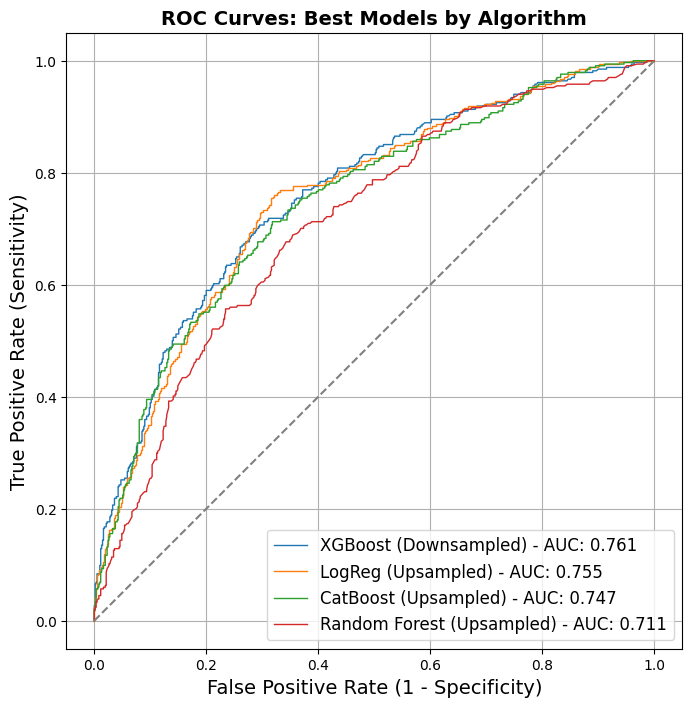

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load ROC CSVs from all sources ---
roc_lr_rf = pd.read_csv("C:/Users/tasne/OneDrive/Desktop/UoB/M7_Interdisciplinary Health Data Research Project/Final Binary/roc_lr_rf_selected.csv")
roc_xgb   = pd.read_csv("C:/Users/tasne/OneDrive/Desktop/UoB/M7_Interdisciplinary Health Data Research Project/Final Binary/roc_xgb_downsampled.csv")
roc_cb    = pd.read_csv("C:/Users/tasne/OneDrive/Desktop/UoB/M7_Interdisciplinary Health Data Research Project/Final Binary/roc_cb_upsampled.csv")

# --- Combine ---
roc_all = pd.concat([roc_lr_rf, roc_xgb, roc_cb], ignore_index=True)

# --- Define AUCs manually for sorting ---
model_auc = {
    "XGBoost (Downsampled) - AUC: 0.761": 0.761, 
    "LogReg (Upsampled) - AUC: 0.755": 0.755,
    "CatBoost (Upsampled) - AUC: 0.747": 0.747,
    "Random Forest (Upsampled) - AUC: 0.711": 0.711
}

# --- Sort models by AUC in descending order ---
sorted_models = sorted(model_auc.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [model for model, _ in sorted_models]

# --- Plot All ROC Curves in sorted order ---
plt.figure(figsize=(8, 8))
for model in sorted_labels:
    df = roc_all[roc_all["Model"] == model]
    plt.plot(df["FPR"], df["TPR"], label=model, linewidth=1)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=14)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)
plt.title("ROC Curves: Best Models by Algorithm", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.gca().set_aspect("equal", adjustable="box")

# --- Save to File ---
plt.savefig("C:/Users/tasne/OneDrive/Desktop/UoB/M7_Interdisciplinary Health Data Research Project/Final Binary/roc_combined_final_models.png", dpi=300, bbox_inches="tight")
plt.show()